
Iteraciones del Método de Bisección:
Iter |       a       |       b       |       c       |      f(c)      |     Error     
-------------------------------------------------------------------------------------------------------------------
   1 | 2.00000000 | 3.00000000 | 2.50000000 | -3.37500000 | 5.00000000e-01
   2 | 2.50000000 | 3.00000000 | 2.75000000 | 0.79687500 | 2.50000000e-01
   3 | 2.50000000 | 2.75000000 | 2.62500000 | -1.41210938 | 1.25000000e-01
   4 | 2.62500000 | 2.75000000 | 2.68750000 | -0.33911133 | 6.25000000e-02
   5 | 2.68750000 | 2.75000000 | 2.71875000 | 0.22091675 | 3.12500000e-02
   6 | 2.68750000 | 2.71875000 | 2.70312500 | -0.06107712 | 1.56250000e-02
   7 | 2.70312500 | 2.71875000 | 2.71093750 | 0.07942343 | 7.81250000e-03
   8 | 2.70312500 | 2.71093750 | 2.70703125 | 0.00904924 | 3.90625000e-03
   9 | 2.70312500 | 2.70703125 | 2.70507812 | -0.02604490 | 1.95312500e-03
  10 | 2.70507812 | 2.70703125 | 2.70605469 | -0.00850557 | 9.76562500e-04
  11 | 2.7060

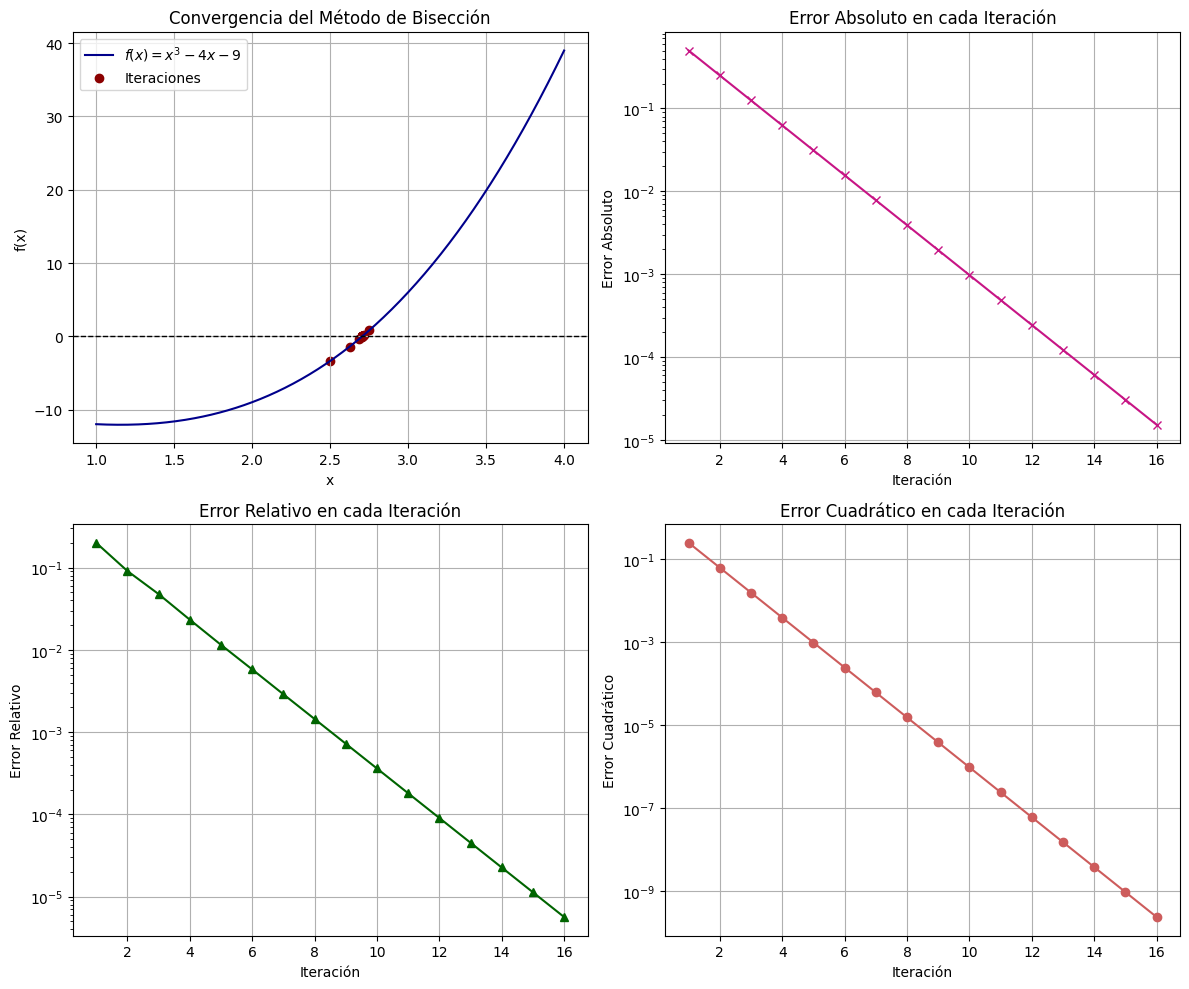


Iteraciones del Método de Bisección:
Iter |       a       |       b       |       c       |      f(c)      |     Error     
----------------------------------------------------------------------------------------------------
   1 | 0.00000000 | 1.00000000 | 0.50000000 | 0.10653066 | 5.00000000e-01
   2 | 0.50000000 | 1.00000000 | 0.75000000 | -0.27763345 | 2.50000000e-01
   3 | 0.50000000 | 0.75000000 | 0.62500000 | -0.08973857 | 1.25000000e-01
   4 | 0.50000000 | 0.62500000 | 0.56250000 | 0.00728282 | 6.25000000e-02
   5 | 0.56250000 | 0.62500000 | 0.59375000 | -0.04149755 | 3.12500000e-02
   6 | 0.56250000 | 0.59375000 | 0.57812500 | -0.01717584 | 1.56250000e-02
   7 | 0.56250000 | 0.57812500 | 0.57031250 | -0.00496376 | 7.81250000e-03
   8 | 0.56250000 | 0.57031250 | 0.56640625 | 0.00115520 | 3.90625000e-03
   9 | 0.56640625 | 0.57031250 | 0.56835938 | -0.00190536 | 1.95312500e-03
  10 | 0.56640625 | 0.56835938 | 0.56738281 | -0.00037535 | 9.76562500e-04
  11 | 0.56640625 | 0.56738

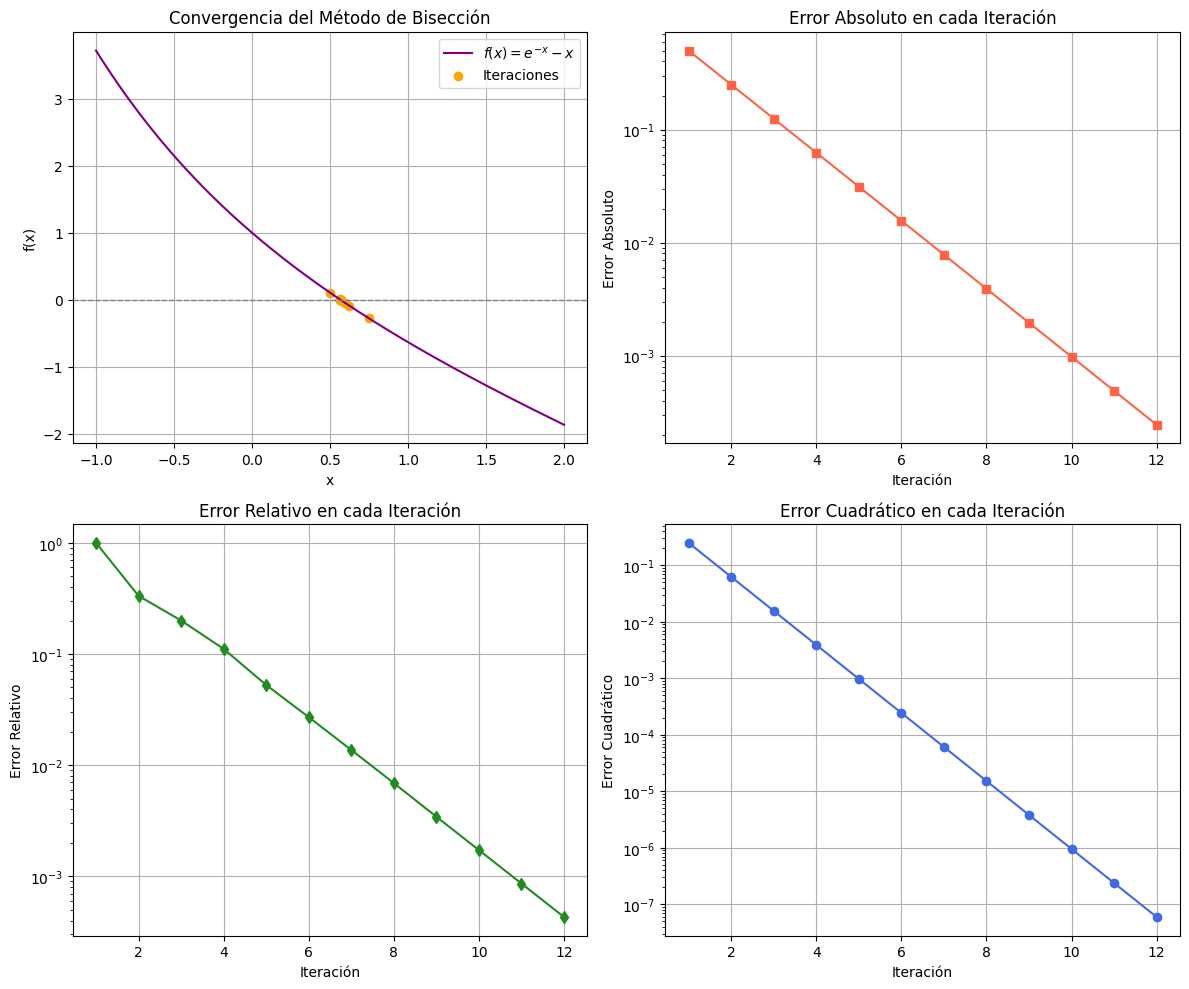

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función que va introducirse en
# el esquema del metodo de biseccion
def f(x):
    return x**3 - 4*x - 9

# Algoritmo numérico del
# Método de Bisección
def biseccion(a, b, tol=1e-5, max_iter=100):
    if f(a) * f(b) >= 0:
        print("El método de bisección no es aplicable en el intervalo dado.")
        return None

    iteraciones = []
    errores_absolutos = []
    errores_relativos = []
    errores_cuadraticos = []

    c_old = a  # Para calcular errores

    print("\nIteraciones del Método de Bisección:")
    print("Iter |       a       |       b       |       c       |      f(c)      |     Error     ")
    print("-" * 115)

    for i in range(max_iter):
        c = (a + b) / 2
        iteraciones.append(c)

        error_abs = abs(c - c_old)
        error_rel = abs((c - c_old) / c) if c != 0 else 0
        error_cuad = (c - c_old) ** 2

        errores_absolutos.append(error_abs)
        errores_relativos.append(error_rel)
        errores_cuadraticos.append(error_cuad)

        print(f"{i+1:4d} | {a:.8f} | {b:.8f} | {c:.8f} | {f(c):.8f} | {error_abs:.8e}")

        if abs(f(c)) < tol or error_abs < tol:
            break

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

        c_old = c

    return iteraciones, errores_absolutos, errores_relativos, errores_cuadraticos

# Parámetros iniciales
# Se introduce el intervalo [a, b]
a, b = 2, 3
iteraciones, errores_absolutos, errores_relativos, errores_cuadraticos = biseccion(a, b)

# Crear la figura
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Gráfica de la función y la convergencia de iteraciones
x = np.linspace(a - 1, b + 1, 400)
y = f(x)

ax[0, 0].plot(x, y, label=r'$f(x) = x^{3}-4x-9$', color='darkblue')
ax[0, 0].axhline(0, color='black', linestyle='--', linewidth=1)  # Línea en y=0
ax[0, 0].scatter(iteraciones, [f(c) for c in iteraciones], color='darkred', label='Iteraciones')
ax[0, 0].set_xlabel('x')
ax[0, 0].set_ylabel('f(x)')
ax[0, 0].set_title("Convergencia del Método de Bisección")
ax[0, 0].legend()
ax[0, 0].grid(True)

# Gráfica del Error Absoluto
ax[0, 1].plot(range(1, len(errores_absolutos) + 1), errores_absolutos, marker='x', linestyle='-', color='mediumvioletred')
ax[0, 1].set_yscale("log")  # Escala logarítmica
ax[0, 1].set_xlabel("Iteración")
ax[0, 1].set_ylabel("Error Absoluto")
ax[0, 1].set_title("Error Absoluto en cada Iteración")
ax[0, 1].grid(True)

# Gráfica del Error Relativo
ax[1, 0].plot(range(1, len(errores_relativos) + 1), errores_relativos, marker='^', linestyle='-', color='darkgreen')
ax[1, 0].set_yscale("log")  # Escala logarítmica
ax[1, 0].set_xlabel("Iteración")
ax[1, 0].set_ylabel("Error Relativo")
ax[1, 0].set_title("Error Relativo en cada Iteración")
ax[1, 0].grid(True)

# Gráfica del Error Cuadrático
ax[1, 1].plot(range(1, len(errores_cuadraticos) + 1), errores_cuadraticos, marker='o', linestyle='-', color='indianred')
ax[1, 1].set_yscale("log")  # Escala logarítmica
ax[1, 1].set_xlabel("Iteración")
ax[1, 1].set_ylabel("Error Cuadrático")
ax[1, 1].set_title("Error Cuadrático en cada Iteración")
ax[1, 1].grid(True)

# Ajustar espacio entre subgráficos
plt.tight_layout()

# Guardar la figura
plt.savefig("biseccion_errores_modificado.png", dpi=300)
plt.show()

"""**Ejercicio 2**"""

# Código que implementa el esquema numérico
# del método de bisección

import numpy as np
import matplotlib.pyplot as plt

# Función a resolver en el esquema de bisección
def f(x):
    return np.exp(-x) - x

# Algoritmo numérico del Método de Bisección
def biseccion(a, b, tol=1e-5, max_iter=100):
    if f(a) * f(b) >= 0:
        print("El método de bisección no es aplicable en el intervalo dado.")
        return None

    iteraciones = []
    errores_absolutos = []
    errores_relativos = []
    errores_cuadraticos = []

    c_old = a  # Para calcular errores

    print("\nIteraciones del Método de Bisección:")
    print("Iter |       a       |       b       |       c       |      f(c)      |     Error     ")
    print("-" * 100)

    for i in range(max_iter):
        c = (a + b) / 2
        iteraciones.append(c)

        error_abs = abs(c - c_old)
        error_rel = abs((c - c_old) / c) if c != 0 else 0
        error_cuad = (c - c_old) ** 2

        errores_absolutos.append(error_abs)
        errores_relativos.append(error_rel)
        errores_cuadraticos.append(error_cuad)

        print(f"{i+1:4d} | {a:.8f} | {b:.8f} | {c:.8f} | {f(c):.8f} | {error_abs:.8e}")

        if abs(f(c)) < tol or error_abs < tol:
            break

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

        c_old = c

    return iteraciones, errores_absolutos, errores_relativos, errores_cuadraticos

# Parámetros iniciales
a, b = 0, 1
iteraciones, errores_absolutos, errores_relativos, errores_cuadraticos = biseccion(a, b)

# Crear la figura
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Gráfica de la función y la convergencia de iteraciones
x = np.linspace(a - 1, b + 1, 400)
y = f(x)

ax[0, 0].plot(x, y, label=r'$f(x) = e^{-x} - x$', color='purple')
ax[0, 0].axhline(0, color='gray', linestyle='--', linewidth=1)  # Línea en y=0
ax[0, 0].scatter(iteraciones, [f(c) for c in iteraciones], color='orange', label='Iteraciones')
ax[0, 0].set_xlabel('x')
ax[0, 0].set_ylabel('f(x)')
ax[0, 0].set_title("Convergencia del Método de Bisección")
ax[0, 0].legend()
ax[0, 0].grid(True)

# Gráfica del Error Absoluto
ax[0, 1].plot(range(1, len(errores_absolutos) + 1), errores_absolutos, marker='s', linestyle='-', color='tomato')
ax[0, 1].set_yscale("log")  # Escala logarítmica
ax[0, 1].set_xlabel("Iteración")
ax[0, 1].set_ylabel("Error Absoluto")
ax[0, 1].set_title("Error Absoluto en cada Iteración")
ax[0, 1].grid(True)

# Gráfica del Error Relativo
ax[1, 0].plot(range(1, len(errores_relativos) + 1), errores_relativos, marker='d', linestyle='-', color='forestgreen')
ax[1, 0].set_yscale("log")  # Escala logarítmica
ax[1, 0].set_xlabel("Iteración")
ax[1, 0].set_ylabel("Error Relativo")
ax[1, 0].set_title("Error Relativo en cada Iteración")
ax[1, 0].grid(True)

# Gráfica del Error Cuadrático
ax[1, 1].plot(range(1, len(errores_cuadraticos) + 1), errores_cuadraticos, marker='o', linestyle='-', color='royalblue')
ax[1, 1].set_yscale("log")  # Escala logarítmica
ax[1, 1].set_xlabel("Iteración")
ax[1, 1].set_ylabel("Error Cuadrático")
ax[1, 1].set_title("Error Cuadrático en cada Iteración")
ax[1, 1].grid(True)

# Ajustar espacio entre subgráficos
plt.tight_layout()

# Guardar la figura
plt.savefig("biseccion_errores_modificado_2.png", dpi=300)
plt.show()
